# ESN Training Example: Noisy Cosine

An echo state network can, impressively, predict even "random" noisy data. (It should be noted that this random noise is not true randomness, it's pseudorandomness based on a deterministic algorithm -- it is this algorithm that the ESN is really predicting.)

We can pretend that a noisy cosine curve is some generic time series data (like electricity demand, perhaps) and the smooth cosine is some other trend that might help guide the ESN.

A demonstration of the ``esn_prediction`` function is given, along with the ``grid_optimizer`` function.

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from tools import esn_prediction, MSE
from optimizers import grid_optimizer

In [2]:
rd.seed(85)
N = 1000
t = np.linspace(0,6*np.pi, N)
noisy_cos = np.cos(t) + (2*rd.random(N)-1)/10
smooth_cos = np.cos(t)

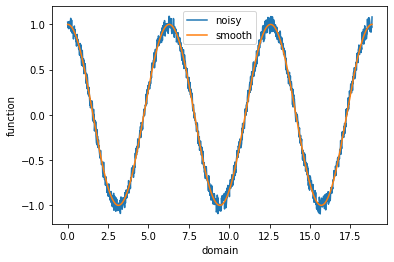

In [3]:
plt.plot(t, noisy_cos, label='noisy')
plt.plot(t, smooth_cos, label='smooth')
plt.legend()
plt.xlabel('domain')
plt.ylabel('function')
plt.show()

In [4]:
X_in = np.concatenate([[noisy_cos, smooth_cos]], axis=1)

In [5]:
params = {'n_reservoir':2000, 
          'sparsity':0.1, 
          'rand_seed':85, 
          'rho':0.7, 
          'noise':0.001, 
          'future':144, 
          'window':72, 
          'trainlen':800}

In [ ]:
pred = esn_prediction(noisy_cos, params)

In [ ]:
futureTotal = params['future']
plt.figure(figsize=(16,9))
plt.title("Noisy Cosine vs Noisy Prediction: One Input")
plt.xlabel("Domain")
plt.ylabel("Function")
plt.plot(t[-2*futureTotal:],
         noisy_cos[-2*futureTotal:],
         'b',label="True Data", 
         alpha=0.7,
         color='tab:blue')
plt.plot(t[-futureTotal:], pred,  alpha=0.8, 
         label='ESN Prediction',
         color='tab:red',
         linestyle='-')
plt.legend()

In [ ]:
pred2 = esn_prediction(X_in.T, params)

In [ ]:
plt.figure(figsize=(16,9))
plt.title("Smooth Cosine vs Smooth Prediction")
plt.xlabel("Domain")
plt.ylabel("Function")
plt.plot(t[-2*futureTotal:],
         smooth_cos[-2*futureTotal:],
         'b',label="True Data", 
         alpha=0.7,
         color='tab:blue')
plt.plot(t[-futureTotal:], pred2.T[1],  alpha=0.8, 
         label='ESN: two inputs',
         color='tab:red',
         linestyle='-')
plt.legend()

In [ ]:
plt.figure(figsize=(16,9))
plt.xlabel("Domain")
plt.ylabel("Function")
plt.title("Noisy Cosine vs Noisy Prediction")
plt.plot(t[-2*futureTotal:],
         noisy_cos[-2*futureTotal:],
         'b',label="Normalized Data", 
         alpha=0.7,
         color='tab:blue')
plt.plot(t[-futureTotal:], pred2.T[0],  alpha=0.8, 
         label='ESN: two inputs',
         color='tab:red',
         linestyle='-')
plt.legend()

In [ ]:
trainingLengths = np.arange(300,800,100)
loss_one = grid_optimizer(X_in.T,
                      params,
                      args=['trainlen'],
                      xset=trainingLengths,
                      verbose=True,
                      visualize=True)

In [ ]:
reservoir_set = [1000, 1500, 2000]
sparsity_set = [0.005, 0.01, 0.03]
loss_two = grid_optimizer(X_in.T,
                      params,
                      args=['n_reservoir', 'sparsity'],
                      xset=reservoir_set,
                      yset=sparsity_set,
                      verbose=True,
                      visualize=True)

In [ ]:
trainingLengths = np.arange(300,800,100)
loss_onevar = grid_optimizer(noisy_cos,
                      params,
                      args=['trainlen'],
                      xset=trainingLengths,
                      verbose=True,
                      visualize=True)

### Try Plotting a 3D Surface with data, instead.

In [ ]:
%matplotlib inline
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')


X = reservoir_set
Y = sparsity_set
Z = loss_two.T.astype(float)

mappable = plt.cm.ScalarMappable()
mappable.set_array(Z)

ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap=mappable.cmap, norm=mappable.norm)
ax.set_xlabel('Reservoir Size')
ax.set_ylabel('Sparsity')
ax.set_zlabel('MSE')


cb = plt.colorbar(mappable)
cb.set_label(label="Mean Squared Error")
fig.tight_layout()
# ax.view_init(140, 100)

In [ ]:
reservoir_set = [1000, 1500, 2000]
sparsity_set = [0.005, 0.01, 0.03]
loss_two = grid_optimizer(X_in.T,
                      params,
                      args=['n_reservoir', 'sparsity'],
                      xset=reservoir_set,
                      yset=sparsity_set,
                      verbose=True,
                      visualize='surface')